%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
LINEAR REGRESSION EQUATION:
y-x = 0.02 + -1.01 x


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['arctanh', 'log10', '__version__', 'fft', 'show_config', 'f', 'arcsin', 'sqrt', 'power', 'sin', 'cos', 'arccos', 'log', 'log2']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


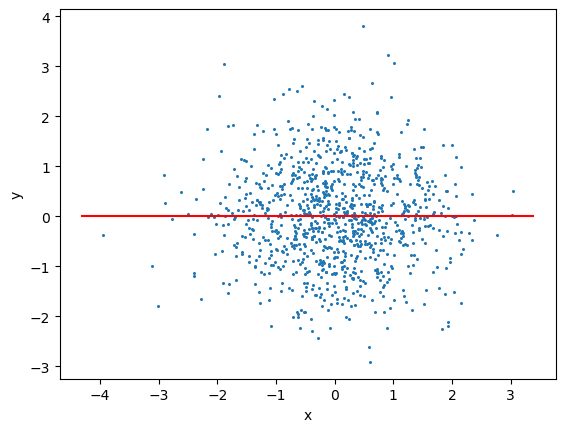

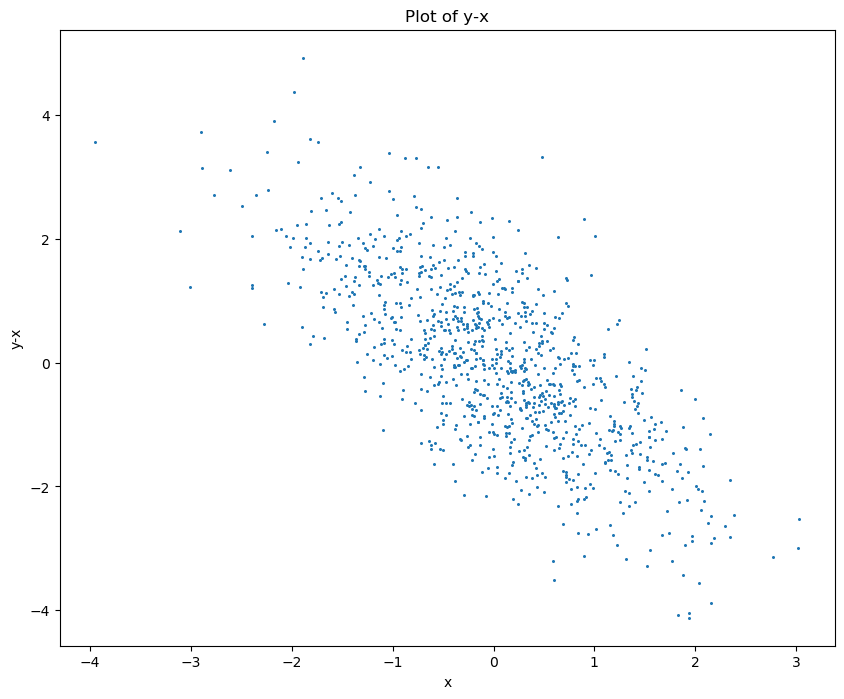

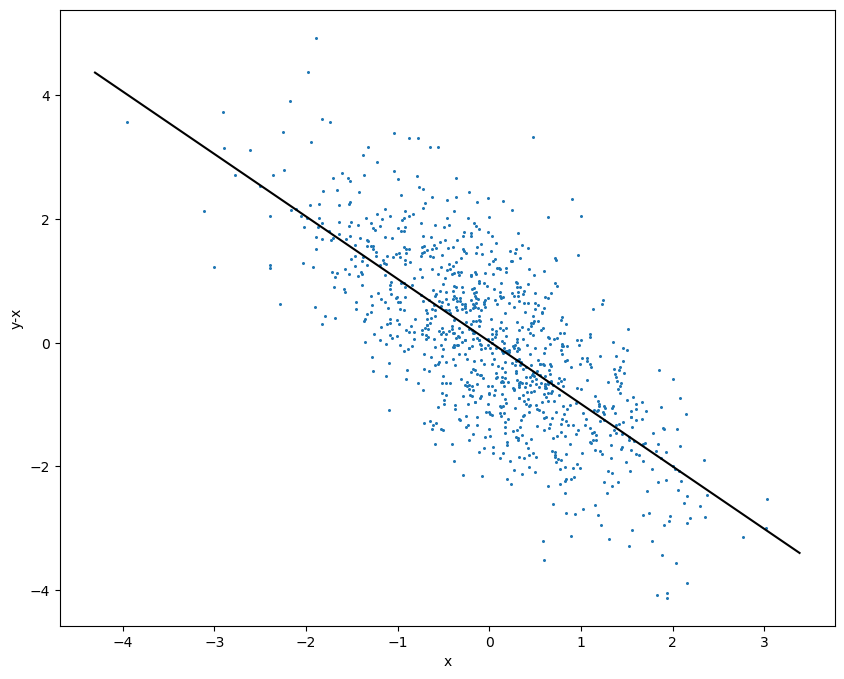

In [ ]:
# Homework Credit: https://github.com/VSerpak/DSE210x-Statistics-and-Probability-in-Data-Science-using-Python/tree/master/Week%209%20Regression%20and%20PCA
%pylab inline
# %pylab magic function is entered at the IPython prompt, it triggers the import of various modules within Matplotlib
from scipy import *
from numpy.linalg import norm
from math import sqrt,sin,cos
import pandas as pd
import numpy as np
from numpy import arange,array,ones,linalg

def f(x, reg):
    return reg[0]+ x*reg[1]

HW=pd.read_csv('data/gauss_R2.csv')
ax= HW.plot(kind='scatter',s=1.4,x="x",y="y");
x0,x1=xlim()
ax.plot([x0,x1],[0,0],'r');

def y_minus_x(HW):
    # input: the HW's dataset
    # output: there is NO OUTPUT
    # the new column column should be called 'y-x'
    HW['y-x'] = HW['y'] - HW['x']
    
# Check Answer
HW=pd.read_csv('data/gauss_R2.csv')
assert y_minus_x(HW) == None 
assert HW.shape == (1000, 3)
assert all( HW.columns.values == array(['x', 'y', 'y-x']) )
assert sum(abs( array(HW["y-x"])[0:10] - \
               array([0.36236278,-2.37726552,-0.36501525,0.05449746,-0.27705517,1.80807383,-2.07001209,
                      -0.67536514,0.67519959,  0.97277652])   )) < 10**-5

# Create Graph
ax= HW.plot(kind='scatter',s=1.4,x="x",y="y-x",figsize=[10,8], title="Plot of y-x");

#
# AUTOGRADER TEST - DO NOT REMOVE
#

def do_regression(HW):
    # input: the HW's dataset
    # output: a numpy array yielding w=(w0,w1) from linear regression
    # vstack merges a column containing only ones with x
    x = HW['x']
    y = HW['y-x']
    A = np.vstack([x, np.ones(len(x))]).T
    w1, w0 = np.linalg.lstsq(A, y, rcond=None)[0]
    return np.array([w0,w1])

# Check Answer
w_hw = do_regression(HW)
assert str(type(w_hw)) == "<class 'numpy.ndarray'>"
assert w_hw.shape == (2,)
assert sum(abs(w_hw[0] - 0.02173387)) < 10**-5

# Plot Graph
print("LINEAR REGRESSION EQUATION:")
print("y-x = {:.2f} + {:.2f} x".format(w_hw[0],w_hw[1]))
ax= HW.plot(kind='scatter',s=1.4,x="x",y="y-x",figsize=[10,8]);
x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w_hw),f(x1,w_hw)],'k');

#
# AUTOGRADER TEST - DO NOT REMOVE
#